In [1]:
%pylab inline
import gdal
import gdalio
import pixelgrid
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


In [90]:
ds = gdal.Open("/home/artef/Pictures/LS08Samples/sample_0_1.tiff")
img = gdalio.readAsArray(ds)
pca = PCA(n_components=3)
pca.fit(img.reshape(-1,12))
img = pca.transform(img.reshape(-1,12)).reshape((img.shape[0],img.shape[1],3)).astype(np.float)
img = (img-np.percentile(img,5,axis=(0,1)))/(np.percentile(img,95,axis=(0,1))-np.percentile(img,5,axis=(0,1)))
img[img<0] = 0
img[img>1] = 1

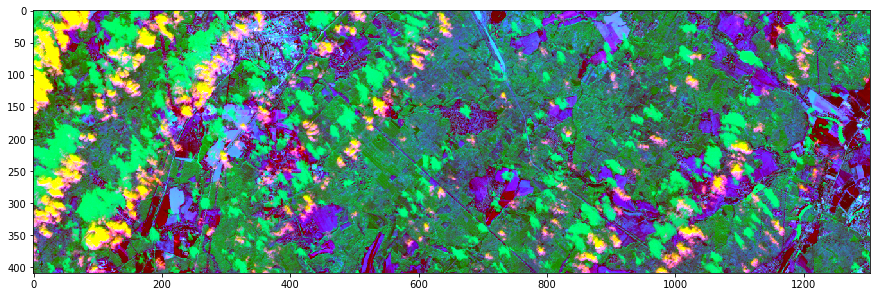

In [91]:
figsize(15,15)
imshow(img);

In [92]:
img = gdalio.readAsArray(ds)

In [94]:
print( ds.GetProjection() )

PROJCS["WGS 84 / UTM zone 37N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",39],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG","32637"]]


In [95]:
ds.GetGeoTransform()

(346125.0, 30.0, 0.0, 6140925.0, 0.0, -30.0)

In [11]:

def wld2pix(transform,geox,geoy):
    """converts a set of map coords to pixel coords"""
    x = ( transform[0] * transform[5] - 
        transform[2] * transform[3] + transform[2] * geoy - 
        transform[5] * geox ) / ( transform[2] * transform[4] - transform[1] * transform[5] )

    y = ( transform[1] * transform[3] - transform[0] * transform[4] -
        transform[1] * geoy + transform[4] * geox ) / ( transform[2] * transform[4] - transform[1] * transform[5] )

    return x,y

def pix2wld(transform,x,y):
    """converts a set of pixels coords to map coords"""
    geox = transform[0] + transform[1] * x + transform[2] * y
    geoy = transform[3] + transform[4] * x + transform[5] * y

    return geox,geoy

In [117]:
def create_test(test_id,x,y):
    
    outx,outy = wld2pix(ds.GetGeoTransform(),x,y)

    print()
    print('@Test')
    print('public void wld2pix_test{}() throws Exception {{'.format(test_id))
    print('    in_vec = new Vec2d({},{});'.format( repr(x), repr(y) ))
    print('    out_vec = CoordUtils.wld2pix(transform,in_vec.x,in_vec.y);')
    print('    assertEquals({},out_vec.x,DELTA);'.format(repr(outx)) )
    print('    assertEquals({},out_vec.y,DELTA);'.format(repr(outy)) )
    print('}')
    
    outx,outy = pix2wld(ds.GetGeoTransform(),x,y)
    print()
    print('@Test')
    print('public void pix2wld_test{}() throws Exception {{'.format(test_id))
    print('    in_vec = new Vec2d({},{});'.format( repr(x), repr(y) ))
    print('    out_vec = CoordUtils.pix2wld(transform,in_vec.x,in_vec.y);')
    print('    assertEquals({},out_vec.x,DELTA);'.format(repr(outx)) )
    print('    assertEquals({},out_vec.y,DELTA);'.format(repr(outy)) )
    print('}')
    
create_test(1,0,0)
create_test(2,0.5,0.5)
create_test(3,1.49,1.49)
create_test(4,1.5,1.5)
create_test(5,1.51,1.51)
create_test(6,-0.5,-0.5)
create_test(7,-1.49,-1.49)
create_test(8,-1.5,-1.5)
create_test(9,-1.51,-1.51)


@Test
public void wld2pix_test1() throws Exception {
    in_vec = new Vec2d(0,0);
    out_vec = CoordUtils.wld2pix(transform,in_vec.x,in_vec.y);
    assertEquals(-11537.5,out_vec.x,DELTA);
    assertEquals(204697.5,out_vec.y,DELTA);
}

@Test
public void pix2wld_test1() throws Exception {
    in_vec = new Vec2d(0,0);
    out_vec = CoordUtils.pix2wld(transform,in_vec.x,in_vec.y);
    assertEquals(346125.0,out_vec.x,DELTA);
    assertEquals(6140925.0,out_vec.y,DELTA);
}

@Test
public void wld2pix_test2() throws Exception {
    in_vec = new Vec2d(0.5,0.5);
    out_vec = CoordUtils.wld2pix(transform,in_vec.x,in_vec.y);
    assertEquals(-11537.483333333334,out_vec.x,DELTA);
    assertEquals(204697.48333333334,out_vec.y,DELTA);
}

@Test
public void pix2wld_test2() throws Exception {
    in_vec = new Vec2d(0.5,0.5);
    out_vec = CoordUtils.pix2wld(transform,in_vec.x,in_vec.y);
    assertEquals(346140.0,out_vec.x,DELTA);
    assertEquals(6140910.0,out_vec.y,DELTA);
}

@Test
public void wld2pi

In [4]:
import csv
with open('./OLD/test_files.csv','r') as f:
    reader = csv.reader(f.readlines())
    # skip header
    next(reader)
    lines = [i for i in reader]

In [228]:
def print_info(line):
    ds1 = gdal.Open(line[0])
    ds2 = gdal.Open(line[1])

    
    px1 = pixelgrid.pixelGridFromFile(ds1.GetDescription())
    px2 = pixelgrid.pixelGridFromFile(ds2.GetDescription())
    
    print('Image1: {}'.format(ds1.GetDescription()))
    print('Image2: {}'.format(ds2.GetDescription()))
    print('Image1 size: {}',px1.getDimensions())
    print('Image2 size: {}',px2.getDimensions())
    print('intersection size: {}'.format(px1.intersection(px2).getDimensions()))

In [229]:
print_info(lines[500])

Image1: /media/artef/96FEEE12FEEDEB07/Users/artef/Maps/tiles/LC08_L1TP_178021_20160926_20170319_01_T1_B_MERGED/LC08_L1TP_178021_20160926_20170319_01_T1_B_MERGED_TILE_1820_2859.TIF
Image2: /media/artef/96FEEE12FEEDEB07/Users/artef/Maps/tiles/LC08_L1TP_178021_20170406_20170414_01_T1_B_MERGED/LC08_L1TP_178021_20170406_20170414_01_T1_B_MERGED_TILE_1818_4902.TIF
Image1 size: {} (3473, 3439)
Image2 size: {} (3473, 3434)
intersection size: (1430, 3322)


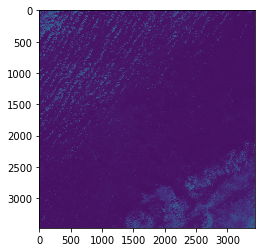

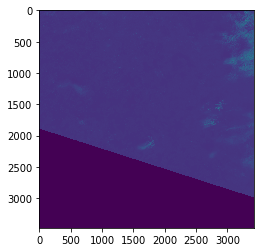

In [6]:
ds1 = gdal.Open(lines[500][0])
b = ds1.GetRasterBand(1)
imshow( b.ReadAsArray() );
show()    @Test
    public void intersection() throws Exception {
    }

ds2 = gdal.Open(lines[500][1])
b = ds2.GetRasterBand(1)
imshow( b.ReadAsArray() );
show()

In [231]:
ds = gdal.Open('/home/artef/IdeaProjects/prrnmosaic/target/test-classes/test_img1.tif')

In [11]:
print('//Make sure file dimensions match')
print('assertEquals({},ds1.GetRasterXSize());'.format(ds1.RasterXSize))
print('assertEquals({},ds1.GetRasterYSize());'.format(ds1.RasterYSize))
print('assertEquals({},ds2.GetRasterXSize());'.format(ds2.RasterXSize))
print('assertEquals({},ds2.GetRasterYSize());'.format(ds2.RasterYSize))

//Make sure file dimensions match
assertEquals(3439,ds1.GetRasterXSize());
assertEquals(3473,ds1.GetRasterYSize());
assertEquals(3434,ds2.GetRasterXSize());
assertEquals(3473,ds2.GetRasterYSize());


In [83]:
def create_test(test_id,x,y):
    
    outx,outy = wld2pix(ds1.GetGeoTransform(),x,y)
    print("@Test\n"
    "public void wld2pix_test{}() throws Exception {{\n"
        "Vec2d ret = g1.wld2pix({},{});\n"
        "assertEquals({},ret.x, DELTA);\n"
        "assertEquals({},ret.y, DELTA);\n"
    "}}\n".format(test_id,x,y,outx,outy))
    
    outx,outy = pix2wld(ds1.GetGeoTransform(),x,y)
    print("@Test\n"
    "public void pix2wld_test{}() throws Exception {{\n"
        "Vec2d ret = g1.pix2wld({},{});\n"
        "assertEquals({},ret.x, DELTA);\n"
        "assertEquals({},ret.y, DELTA);\n"
    "}}\n".format(test_id,x,y,outx,outy))
    
create_test(1,0,0)
create_test(2,0.5,0.5)
create_test(3,1.49,1.49)
create_test(4,1.5,1.5)
create_test(5,1.51,1.51)
create_test(6,-0.5,-0.5)
create_test(7,-1.49,-1.49)
create_test(8,-1.5,-1.5)
create_test(9,-1.51,-1.51)

@Test
public void wld2pix_test1() throws Exception {
Vec2d ret = g1.wld2pix(0,0);
assertEquals(-12549.5,ret.x, DELTA);
assertEquals(205288.5,ret.y, DELTA);
}

@Test
public void pix2wld_test1() throws Exception {
Vec2d ret = g1.pix2wld(0,0);
assertEquals(376485.0,ret.x, DELTA);
assertEquals(6158655.0,ret.y, DELTA);
}

@Test
public void wld2pix_test2() throws Exception {
Vec2d ret = g1.wld2pix(0.5,0.5);
assertEquals(-12549.483333333334,ret.x, DELTA);
assertEquals(205288.48333333334,ret.y, DELTA);
}

@Test
public void pix2wld_test2() throws Exception {
Vec2d ret = g1.pix2wld(0.5,0.5);
assertEquals(376500.0,ret.x, DELTA);
assertEquals(6158640.0,ret.y, DELTA);
}

@Test
public void wld2pix_test3() throws Exception {
Vec2d ret = g1.wld2pix(1.49,1.49);
assertEquals(-12549.450333333334,ret.x, DELTA);
assertEquals(205288.45033333334,ret.y, DELTA);
}

@Test
public void pix2wld_test3() throws Exception {
Vec2d ret = g1.pix2wld(1.49,1.49);
assertEquals(376529.7,ret.x, DELTA);
assertEquals(6158610.3

In [29]:
px1 = pixelgrid.pixelGridFromFile(ds1.GetDescription())
px2 = pixelgrid.pixelGridFromFile(ds2.GetDescription())
pxi = px1.intersection(px2)

In [34]:
print('assertEquals(px1.get_projection(),pxi.get_projection());')
print('assertEquals({},pxi.xRes,DELTA)'.format(pxi.xRes))
print('assertEquals({},pxi.yRes,DELTA)'.format(pxi.yRes))

print('assertEquals({},pxi.xMin,DELTA)'.format(pxi.xMin))
print('assertEquals({},pxi.xMax,DELTA)'.format(pxi.xMax))
print('assertEquals({},pxi.yMin,DELTA)'.format(pxi.yMin))
print('assertEquals({},pxi.yMax,DELTA)'.format(pxi.yMax))

assertEquals(PROJCS["WGS 84 / UTM zone 37N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",39],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG","32637"]],pxi.get_projection());
assertEquals(30.0,pxi.xRes,DELTA)
assertEquals(30.0,pxi.yRes,DELTA)
assertEquals(376485.0,pxi.xMin,DELTA)
assertEquals(476145.0,pxi.xMax,DELTA)
assertEquals(6128655.0,pxi.yMin,DELTA)
assertEquals(6171555.0,pxi.yMax,DELTA)


In [9]:
ds1 = gdal.Open('/home/artef/IdeaProjects/prrn-mosaic/src/test/resources/test_img1.tif')
ds2 = gdal.Open('/home/artef/IdeaProjects/prrn-mosaic/src/test/resources/test_img2.tif')

px1 = pixelgrid.pixelGridFromFile(ds1.GetDescription())
px2 = pixelgrid.pixelGridFromFile(ds2.GetDescription())
pxi = px1.intersection(px2)

In [12]:
print('Image1')
print( wld2pix(px1.makeGeoTransform(),pxi.xMin,pxi.yMin) )
print( wld2pix(px1.makeGeoTransform(),pxi.xMax,pxi.yMax) )
print()
print('Image2')
print( wld2pix(px2.makeGeoTransform(),pxi.xMin,pxi.yMin) )
print( wld2pix(px2.makeGeoTransform(),pxi.xMax,pxi.yMax) )

Image1
(0.0, 1000.0)
(700.0, 70.0)

Image2
(112.0, 930.0)
(812.0, 0.0)


In [28]:
# Area of first image : 0-700, 70-1000
img1 = ds1.GetRasterBand(1).ReadAsArray()[70:1000,0:700].astype(np.float64)

# Area of second image: 112-812, 0-930
img2 = ds2.GetRasterBand(1).ReadAsArray()[0:930,112:812].astype(np.float64)

img_diff = (img1.astype(np.float)-img2.astype(np.float))
img_diff = np.abs( (img_diff - np.percentile(img_diff,5))/(np.percentile(img_diff,95) - np.percentile(img_diff,5)) )

In [104]:
np.mean(img2)

9949.9581536098303

In [105]:
np.std(img2)

586.3154600610809

In [51]:
p5 = np.percentile( np.concatenate( (np.ravel(img2),np.ravel(img1)) ) ,1)
p95 = np.percentile( np.concatenate( (np.ravel(img2),np.ravel(img1)) ) ,99)

In [52]:
print(p5)

8192.0


In [53]:
print(p95)

12309.0


In [54]:
img1.shape

(930, 700)

In [72]:
from PIL import Image
import numpy as np

def normalize(img):
    p5 = 8192.0
    p95 = 12309.0
    img = (img-p5)/(p95-p5)
    img[img<0] = 0
    img[img>1] = 1
    img = np.round( img*255 )
    return img
    
def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype=np.ubyte )
    return data

In [86]:
img1.dtype

dtype('float64')

In [89]:
def calc_mean(arr):
    s = 0;
    count = 0;
    for d in arr:
        s += d;
        count += 1;
    
    return s/count;

In [90]:
calc_mean(np.ravel(img1))

8513.5624178187409

In [91]:
img1.mean()

8513.5624178187409

In [92]:
np.mean(img1)

8513.5624178187409

In [96]:
ds1.GetRasterBand(1).ReadAsArray().astype(np.double)

array([[ 8354.,  8264.,  8237., ...,  8212.,  8216.,  8230.],
       [ 8235.,  8228.,  8199., ...,  8197.,  8227.,  8267.],
       [ 8219.,  8209.,  8208., ...,  8219.,  8258.,  8258.],
       ..., 
       [ 8389.,  8370.,  8367., ...,  8450.,  8459.,  8446.],
       [ 8414.,  8406.,  8409., ...,  8440.,  8442.,  8423.],
       [ 8520.,  8445.,  8457., ...,  8438.,  8455.,  8446.]])

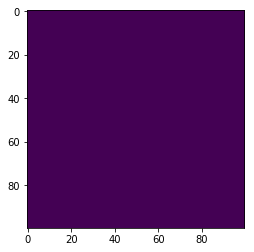

In [117]:
ds1.GetRasterBand(1).ReadAsArray().astype(np.double)

In [15]:
b.DataType

3

In [27]:
b.DataType

3

n bands: 12


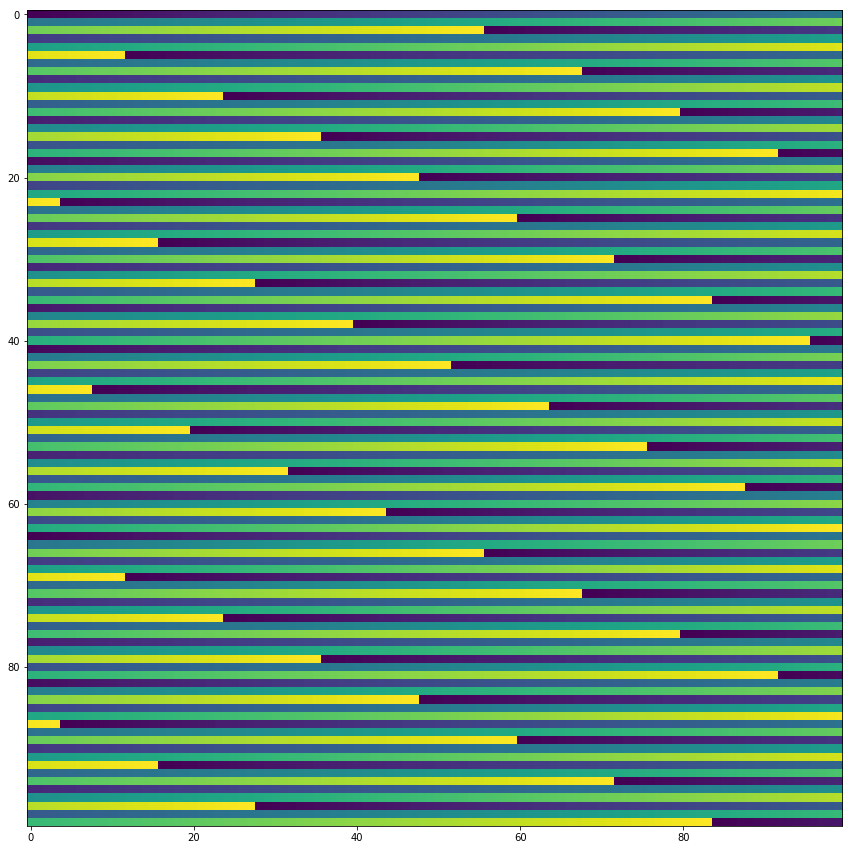

In [26]:
ds = gdal.Open('/home/artef/Desktop/write_test.tiff')
print('n bands:',ds.RasterCount)
b = ds.GetRasterBand(1)
figsize(15,15)
imshow( b.ReadAsArray() );

In [51]:
bw = 100
xoff = -50

xoff = xoff%bw
if xoff > 0:
    xoff -= bw

xoff

-50

In [64]:
def get_block_count(width, boff, bw):
    return (width-boff)//bw + (1 if (width-boff)%bw > 0 else 0)

In [77]:
get_block_count(100,-9,10)

11

# AsyncGdalReader Tests assist

In [2]:
ds1 = gdal.Open('/home/artef/IdeaProjects/prrn-mosaic/src/test/resources/test_img1.tif')
ds2 = gdal.Open('/home/artef/IdeaProjects/prrn-mosaic/src/test/resources/test_img2.tif')

px1 = pixelgrid.pixelGridFromFile(ds1.GetDescription())
px2 = pixelgrid.pixelGridFromFile(ds2.GetDescription())
pxi = px1.intersection(px2)

In [3]:
for band_id in range(12):

SyntaxError: unexpected EOF while parsing (<ipython-input-3-2d274dd31b86>, line 1)

In [5]:
b = ds1.GetRasterBand(1)

In [11]:
b.ReadAsArray()

array([[8354, 8264, 8237, ..., 8212, 8216, 8230],
       [8235, 8228, 8199, ..., 8197, 8227, 8267],
       [8219, 8209, 8208, ..., 8219, 8258, 8258],
       ..., 
       [8389, 8370, 8367, ..., 8450, 8459, 8446],
       [8414, 8406, 8409, ..., 8440, 8442, 8423],
       [8520, 8445, 8457, ..., 8438, 8455, 8446]], dtype=uint16)

In [65]:
def print_info(ds_id,band_id,data):
    print("\t// Dataset {}, Band {}".format(ds_id,band_id))
    print("\tassertEquals({}L,pixel_sum[{}][{}]);".format(data.sum(),ds_id,band_id))
    print("\tassertEquals({}L,pixel_square_sum[{}][{}]);".format((data.astype(np.int64)*data.astype(np.int64)).sum(),ds_id,band_id))
    print("\tassertEquals({},pixel_count[{}][{}]);".format(data.size,ds_id,band_id))
    print()

for band_id in range(12):
    # Area of first image : 0-700, 70-1000
    img1 = ds1.GetRasterBand(band_id+1).ReadAsArray()[70:1000,0:700]

    # Area of second image: 112-812, 0-930
    img2 = ds2.GetRasterBand(band_id+1).ReadAsArray()[0:930,112:812]
    
    print_info(0,band_id,img1)
    print_info(1,band_id,img2)

	// Dataset 0, Band 0
	assertEquals(5542329134L,pixel_sum[0][0]);
	assertEquals(47401667496854L,pixel_square_sum[0][0]);
	assertEquals(651000,pixel_count[0][0]);

	// Dataset 1, Band 0
	assertEquals(6477422758L,pixel_sum[1][0]);
	assertEquals(64673876933318L,pixel_square_sum[1][0]);
	assertEquals(651000,pixel_count[1][0]);

	// Dataset 0, Band 1
	assertEquals(5088121271L,pixel_sum[0][1]);
	assertEquals(40041072062779L,pixel_square_sum[0][1]);
	assertEquals(651000,pixel_count[0][1]);

	// Dataset 1, Band 1
	assertEquals(5997901507L,pixel_sum[1][1]);
	assertEquals(55564124615475L,pixel_square_sum[1][1]);
	assertEquals(651000,pixel_count[1][1]);

	// Dataset 0, Band 2
	assertEquals(4705085091L,pixel_sum[0][2]);
	assertEquals(34358462063259L,pixel_square_sum[0][2]);
	assertEquals(651000,pixel_count[0][2]);

	// Dataset 1, Band 2
	assertEquals(5420538092L,pixel_sum[1][2]);
	assertEquals(45585736356346L,pixel_square_sum[1][2]);
	assertEquals(651000,pixel_count[1][2]);

	// Dataset 0, Band 3


In [28]:
img1.sum()

5542329134.0

In [21]:
img2.sum()

6477422758.0

In [22]:
12019751892

12019751892

In [15]:
5542329134/img1.size

8513.56241781874

In [16]:
img1.mean()

8513.5624178187409

In [18]:
6853958/651000

10.528353302611366

In [26]:
12019751892/651000

18463.520571428573

In [27]:
651000*2

1302000

In [54]:
# Area of first image : 0-700, 70-1000
img1 = ds1.GetRasterBand(1).ReadAsArray()[70:1000,0:700]

# Area of second image: 112-812, 0-930
img2 = ds2.GetRasterBand(1).ReadAsArray()[0:930,112:812]

In [57]:
(np.ravel(img1)**2).sum()

20806863766

In [63]:
(np.ravel(img1)[:700]**2).sum()

22615793

In [62]:
(np.ravel(img1)[:700].astype(np.int32)**2).sum()

52253366001